## Import necessary libraries

In [17]:
import pandas as pd 
import numpy as np
import time
import matplotlib.pyplot as plt
from ModelImplementationClass import Models_Implementation
from DataPreparationClass import DataPreparation 
from FinalModelEvaluationClass import FinalModelEvaluation
from sklearn.model_selection import train_test_split

## Load data

In [2]:
X = np.load("UPDATE YOUR DATAFILNAME HERE")
y = np.load("UPDATE YOUR DATAFILNAME HERE")

## Preprocessing Visualization

#### An example of my preprocessing process in highlighting and cleaning noise in digit pixel background

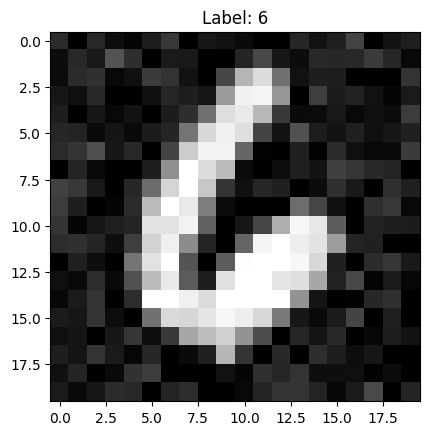

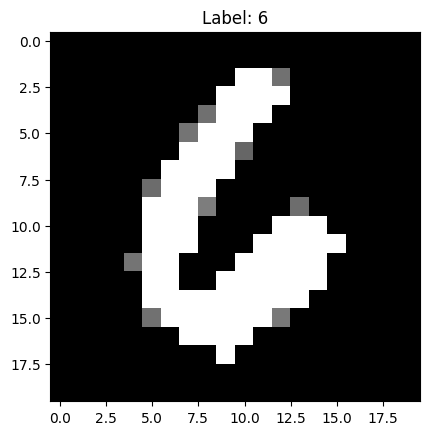

In [3]:
## Cleans the digit background | For more information, refer to the clean_data method in the "DataPreparationClass.py" file

# Før
plt.imshow(X[2023].reshape(20,20), cmap="gray")
plt.title(f"Label: {y[2023]}")
plt.show()

# Rense - (dette skjer i "DataPreparation().clean_data(X)")
X[X<=100] = 0 # 35
X[X[:]>= 140] = 255 #250

# Etter
plt.imshow(X[2023].reshape(20,20), cmap="gray")
plt.title(f"Label: {y[2023]}")
plt.show()


### DataPreparation

In [4]:
## Cleane digit background and normalize X_trian
X = DataPreparation().clean_data(X)

### Splitte dataene til trening og test

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 2023)
X_val_train, _, y_val_train, _ = train_test_split(X_train, y_train, test_size = .3, random_state = 2023)

In [6]:
X_train.shape, X_val_train.shape

((75461, 400), (52822, 400))

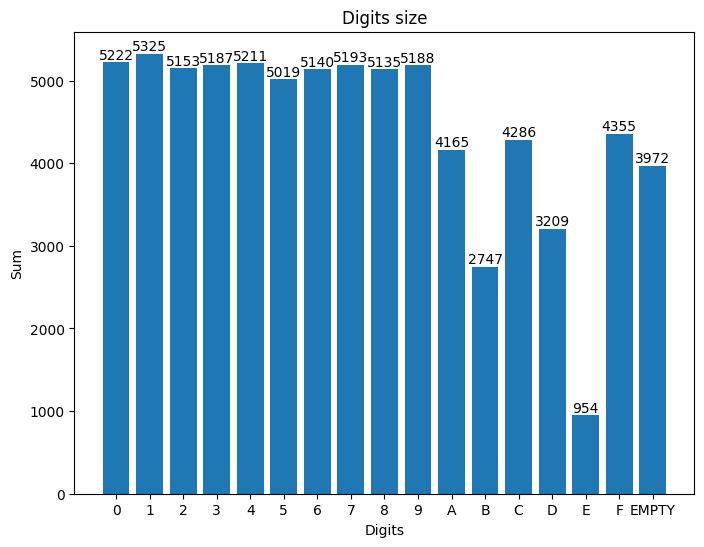

In [4]:
## Plot the distribution of digits in the labels.
plot_digits = DataPreparation().plot_digits_distribution(y_train)

## Find best validation model (Cross Validation)

In [8]:
start = time.time()
models_validation = Models_Implementation()
models_validation.validate_all(X_val_train, y_val_train, save_model = True)
best_final_validation_model, file_name = models_validation.find_best_validation_model()
slutt = time.time()
tid = slutt - start
print(f"Totalt tid for å validere alle modeller: {round(tid/60)}m:{round(tid)}s.")


    ** Support Vector Machine **
        - Start:
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .................................C=1, kernel=linear; total time= 6.0min
[CV] END ...................................C=1, kernel=poly; total time= 8.9min
[CV] END ...............................C=1, kernel=sigmoid; total time=406.9min
[CV] END ................................C=10, kernel=linear; total time= 9.8min
[CV] END ...............................C=10, kernel=sigmoid; total time=38.1min
[CV] END ...............................C=100, kernel=linear; total time=35.1min
Mean score: 93.91541373223188
With parameter: {'C': 100, 'kernel': 'poly'}
Fit mean time: 195.47994804382324
Prediction mean time: 42.082753324508666
Model saved!
Done!



    ** KNN **
        - Start:
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mean score: 89.41351092289791
With parameter: {'n_neighbors': 3, 'weights': 'distance'}
Fit mean time: 0.218910551071167
Prediction mean ti

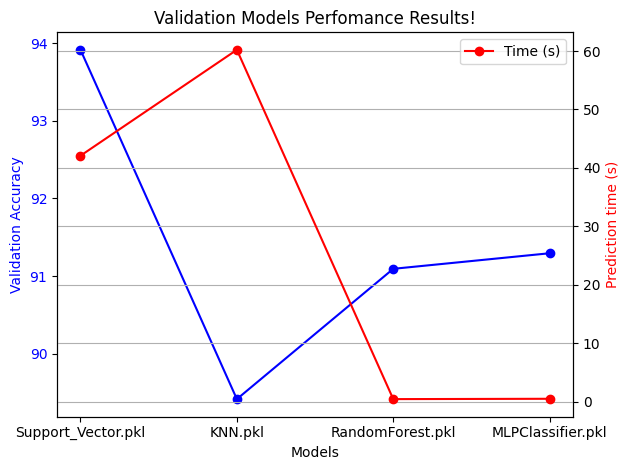

In [9]:
# Plot and compare model performance in terms of accuracy and prediction time.
models_validation.plot_model_comparsion()

## Final Model Evaluation

### Traine, evaluate og plote the best validationsmodell performance on X_test og y_test dataset

RandomForest accuracy score: 0.9216474444203951
Time: 0m:1s.








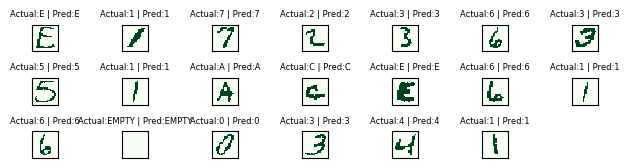

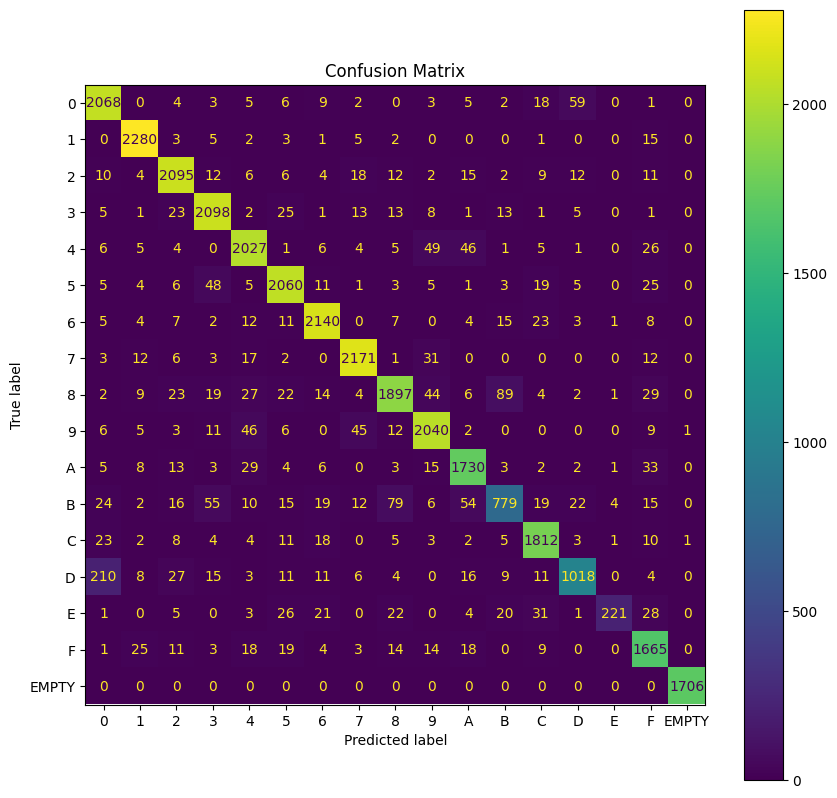

In [10]:
model = FinalModelEvaluation()
model.learn(X_train, y_train, file_name, best_final_validation_model, save_model = True)
model.final_evaluation(X_test, y_test)